# Project: Predicting Insurance Costs
---

## **1. Project Overview**

This data science project explores linear regression modeling in Python applied to a real-world dataset.

### **1.1 Goals and Objectives**

The primary objective is to investigate the relationship between various patient characteristics and the total medical cost. The aim is to construct an effective predictive model for medical costs based on patient information.

The project like be presented in the following sections:


**2. Exploring The Dataset**

- The initial phase involves a comprehensive exploration of the Medical Cost Data Set sourced from Kaggle. This dataset provides a comprehensive view of individual medical insurance bills, including demographic and personal characteristics.

**3. Dividing The Data**

- To ensure model robustness, the dataset is divided into appropriate subsets for training and testing.

**4. Build The Model**

- The core of the project entails constructing a linear regression model. Advanced data analysis techniques are applied to create a predictive model for medical costs based on patient information.

**5. Residual Diagnostics**

- In this section, residual diagnostics are conducted to evaluate the model's performance and assess its fit to the data.

**6. Interpreting The Model**

- The focus here is on interpreting the constructed model, identifying key factors influencing medical costs, and explaining their significance.

**7. Final Model Evaluation**

- This section centers on evaluating the final model's performance. Assessment is made regarding how well it predicts medical costs and discussion includes strengths and limitations.

**8. Drawing Conclusions**

- Summarizing key findings and their implications for understanding the factors that drive medical costs is the primary objective of this section.

**9. Next Steps**

- As this project concludes, potential next steps for further exploration, research, or improvements in the predictive model are outlined.

Through this project, data science methodologies are applied to healthcare data, yielding valuable insights into the dynamics of medical costs. Findings and methods employed in each of these project sections will be presented.

In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, shapiro, normaltest
 

# import sklearn modules for linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Setting up the notebook
import warnings 
sns.set_theme(style='darkgrid')

### 1.2 Defining functions for later use

In [153]:
# Code for displaying Markdown content used typically in conjunction display() 
# for displaying multiple dataframes in a single cell

from IPython.display import Markdown, display

def display_markdown(content, bold=True) -> None:
    """
    Display Markdown content using IPython.display.
    
    Parameters:
    content (str): The Markdown content to be displayed.
    bold (bool): Set to false to remove bold text by default
    """
    
    # Making content bold by default
    if bold:
        content = f'**{content}**'
    
    # Use IPython's display function to render Markdown content
    display(Markdown(content))

In [154]:
# This function takes in a list of pandas objects (either DataFrames or Series)
# and displays them side by side. It can be used to compare data from multiple
# DataFrames or Series. For example, you can display the results of various
# feature engineering steps side by side to compare them.

import pandas as pd
from IPython.display import display, HTML

def disp_table_side_by_side(*args):
    """Display pandas objects side-by-side.

    Parameters:
        *args: The pandas objects to display.

    Example:
        >>> display_side_by_side(df1, df2, df3)
    """
    # Convert DataFrames/Series to HTML tables
    tables = []
    for obj in args:
        if isinstance(obj, pd.DataFrame):
            tables.append(obj.to_html())
        elif isinstance(obj, pd.Series):
            # Convert Series to DataFrame and then to HTML
            df = pd.DataFrame(obj)
            tables.append(df.to_html())
        else:
            raise ValueError("Input must be a DataFrame or Series")

    # Create custom HTML to display tables side by side
    custom_html = ''.join([f'<div style="display: inline-block; margin-right: 20px;">{table}</div>' for table in tables])

    # Display custom HTML
    display(HTML(custom_html))

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd

# Uncomment the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

def plot_df_distributions(df_input: pd.DataFrame, **kwargs) -> None:
    """
    Plots distribution plots for numeric columns in a DataFrame.

    Parameters:
    df (DataFrame): The input data frame.
    *args: Additional arguments for customizing the plots.
    **kwargs: Additional keyword arguments for customizing the plots.
        figsize (tuple): Figure size (default: (20, 4 * num_rows)).
        bins (int): Number of bins in the histogram (default: 20).
        kde (bool): Whether to include KDE (default: True).
        title_fontsize (int): Fontsize for subplot titles (default: 16).
        title_fontweight (str): Font weight for subplot titles (default: 'bold').
        title_color (str): Color for subplot titles (default: 'grey').
        num_columns (int): Number of columns in the subplot grid (default: 3).
        color_palette (str or list): A color palette name or a list of colors to use in the plots (default: None).
        x_label (str): Label for the x-axis (default: None).
        y_label (str): Label for the y-axis (default: None).
        subplot_spacing (float): Adjust the spacing between subplots (e.g., 0.2 for 20% spacing, default: 0.5).
        title_prefix (str): A prefix to be added to all subplot titles (default: '').
        save_to_file (str): File path to save the plots. If provided, the plots are saved to this file (default: None).
        transparency (float): The level of transparency for plot elements (0.0 to 1.0, default: 1.0).
        font_family (str): Font family for plot labels and titles (default: None).
        legend_position (str): Position of the legend (e.g., "upper right", "lower left", default: None).
        grid_style (str): Style of the grid lines (e.g., "dotted", "dashed", default: '-').
        kde_bandwidth (float): Bandwidth parameter for KDE estimation (default: None).

    Returns:
    None
    """
    
    df = df_input.copy()

    # Get a list of numeric columns in the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the number of subplot rows and columns
    num_rows = len(numeric_columns) // kwargs.get("num_columns", 3)
    if len(numeric_columns) % kwargs.get("num_columns", 3) != 0:
        num_rows += 1

    # Create a figure with subplots
    figsize = kwargs.get("figsize", (20, 4 * num_rows))
    plt.figure(figsize=figsize)

    # Set the color palette if provided, otherwise use the default Seaborn palette
    color_palette = kwargs.get("color_palette", None)
    if color_palette:
        if isinstance(color_palette, str) and color_palette in sns.palettes.SEABORN_PALETTES:
            sns.set_palette(color_palette)
        elif isinstance(color_palette, list) and all(isinstance(color, str) for color in color_palette):
            sns.set_palette(color_palette)
        else:
            warnings.warn("Invalid color_palette value. Using the default Seaborn palette.", UserWarning)
            sns.set_palette(sns.color_palette())
    
    # Loop through each numeric column and create a subplot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, kwargs.get("num_columns", 3), i)  # Create a subplot in the grid

        # Use try-except to temporarily suppress the warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)

            # Create a histogram with a kernel density estimate
            sns.histplot(df[column], bins=kwargs.get("bins", 20), kde=kwargs.get("kde", True))
        
        # Customize axis labels
        plt.xlabel(kwargs.get("x_label", None))
        plt.ylabel(kwargs.get("y_label", None))

        # Add a title to the subplot with a custom prefix
        title_prefix = kwargs.get("title_prefix", "")
        plt.title(f'{title_prefix}Distribution of {column}',
                  fontsize=kwargs.get("title_fontsize", 16),
                  fontweight=kwargs.get("title_fontweight", 'bold'),
                  color=kwargs.get("title_color", 'grey'),
                  wrap=True)

    # Adjust layout and subplot spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=kwargs.get("subplot_spacing", 0.5))

    # Customize legend, font family, and grid style
    legend_position = kwargs.get("legend_position", None)
    if legend_position:
        plt.legend(loc=legend_position)
    plt.grid(True, linestyle=kwargs.get("grid_style", '-'), alpha=kwargs.get("transparency", 1.0))

    # Customize font family
    font_family = kwargs.get("font_family", None)
    if font_family:
        plt.rcParams['font.family'] = font_family

    # Save plots to a file if specified, otherwise display them
    save_to_file = kwargs.get("save_to_file", None)
    if save_to_file:
        plt.savefig(save_to_file)
    else:
        plt.show()


In [156]:
import pandas as pd
from scipy.stats import shapiro, normaltest

def test_normality_and_print_results(series: pd.Series, alpha=0.01) -> None:
    """
    Test the normality of data using both the Shapiro-Wilk test and normaltest,
    and print the results.

    Parameters:
    - data: pandas Series 
      The transformed data to be tested for normality.
    - alpha: float, optional (default=0.01)
      The significance level for the normality tests.

    Returns:
    - None
    """
    
    data = series.copy()

    # Perform the Shapiro-Wilk test
    _, shapiro_p_value = shapiro(data)
    
    # Perform the normality test (combining skewness and kurtosis)
    _, normaltest_p_value = normaltest(data)

    # Print Shapiro-Wilk test results
    print(f"Shapiro-Wilk p-value: {shapiro_p_value}")
    if shapiro_p_value < alpha:
        print("Shapiro-Wilk Test: The data does not follow a normal distribution.")
    else:
        print("Shapiro-Wilk Test: The data follows a normal distribution.")

    # Print normaltest results
    print(f"Normaltest p-value: {normaltest_p_value}")
    if normaltest_p_value < alpha:
        print("Normaltest: The data does not follow a normal distribution.")
    else:
        print("Normaltest: The data follows a normal distribution.")

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Uncommnet the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

# An overly complicated, but Beautiful heat map created using scatterplots
# TODO: improve the customisation with kwargs


def heatmap(x, y, **kwargs):
    
    
    """
    Create a heatmap visualization using scatter plots.

    Parameters:
        x (list): List of x-axis data values.
        y (list): List of y-axis data values.
        **kwargs: Additional keyword arguments for customization.
            - color: List of colors for data points.
            - palette: Color palette for mapping data values to colors.
            - color_range: Range of values to be mapped to the palette.
            - size: List of sizes for data points.
            - size_range: Range of sizes for data points.
            - size_scale: Scaling factor for sizes.
            - marker: Marker style for scatter plot.
            - x_order: Order of x-axis categories.
            - y_order: Order of y-axis categories.
            - title: Title for the main scatter plot.
    
    Returns:
        None
    """


    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    if 'title' in kwargs:
        title = kwargs['title']
    else:
        title = 'No Figure Title Set '
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'title'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right', color='grey')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num], color='grey')
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    
    
    # Set the title for the main scatter plot
    #ax_scatter = plt.gca()  # Get the current axis for the main scatter plot
    ax.set_title(kwargs.get('title', 'No Figure Title Set'), fontsize=20, 
                 fontweight='bold', color='grey', loc='left',
                 linespacing=1, wrap=True,
                 )

    
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = y[1] - y[0]
        ax.barh(
            y=y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        ax.yaxis.set_ticks_position('none')
        

def corrplot(df: pd.DataFrame, size_scale=500, marker='s', title='No Figure Title Set'):
    """
    Create a correlation heatmap plot.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing correlation data.
        size_scale (int): Scaling factor for scatter plot point sizes.
        marker (str): Marker style for scatter plot.
        title (str): Title for the plot.

    Returns:
        None
    """
    
    data = df.copy()
    
    sns.set(color_codes=True)
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale,
        title=title  # Pass the title parameter to heatmap
    )
    sns.set(color_codes=False)

In [158]:
import pandas as pd

def abs_corr_to_target(df_input: pd.DataFrame, 
                           target_col: str, 
                           nonlinear_corr=False, 
                           nonlinear_corr_method='spearman',
                           exclude_target=True,
                           ) ->pd.DataFrame:
    """
    Returns a dataframe with absolute values of correlation to target variable/column
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing correlation data.
        target_col (str): The target column to be used for correlation
        nonlinear_corr (bool): Set to True to use nonlinaer correlation, Spearman's rank by default
        nonlinear_corr_method (str): The method to be used for nonlinear correlation.
    
    Returns:
        df_corr (pd.DataFrame): A dataframe with absolute values of correlation to target variable/column
    """
    
    df = df_input.copy()
    
    # Get correlation to target variable
    if nonlinear_corr:
        df_corr = df.corr(method=nonlinear_corr_method)[target_col].abs().to_frame()
        df_corr.reset_index(inplace=True)
        
        # Rename the columns
        corr_col_name = f'Nonlin ({nonlinear_corr_method}) corr to: `{target_col}`'
        df_corr.columns = ['Features', corr_col_name]
        
        # Sort the values in descending order
        df_corr = df_corr.sort_values(by=corr_col_name, ascending=False)
        
    else:
        df_corr = df.corr()[target_col].abs().to_frame()
        df_corr.reset_index(inplace=True)
        
        # Rename the columns
        corr_col_name = f'lin corr to: `{target_col}`'
        df_corr.columns = ['Features', corr_col_name]
        
        # Sort the values in descending order
        df_corr = df_corr.sort_values(by=corr_col_name, ascending=False)
        

    
    if exclude_target:
        # drop target value row from the dataframe
        df_corr = df_corr[df_corr['Features'] != target_col]
    
    return df_corr


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd

# Uncomment the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

def plot_box_plots(df_input: pd.DataFrame, y_col: str, **kwargs) -> None:
    """
    Plots box plots for comparing a specific column against other columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input data frame.
    y_col (str): The column name to be used on the y-axis (for box plot comparisons).
    **kwargs: Additional keyword arguments for customizing the plots.
        figsize (tuple): Figure size (default: (20, 6)).
        num_columns (int): Number of columns in the subplot grid (default: 3).
        unique_value_threshold (int): Threshold for unique values to exclude columns (default: 20).
        bin_count (int): Number of bins for automatic binning of columns (default: None).
        exclude_cols (list): List of column names to exclude from the plots (default: None).
        include_cols (list): List of column names to include in the plots (default: None).
        notch (bool): Whether to draw notches around the median (default: False).
        sym (str or None): Symbol for identifying outliers (default: None).
        title_fontsize (int): Fontsize for subplot titles (default: 16).
        title_fontweight (str): Font weight for subplot titles (default: 'bold').
        title_color (str): Color for subplot titles (default: 'grey').
        color_palette (str or list): A color palette name or a list of colors to use in the plots (default: None).
        x_label (str): Label for the x-axis (default: None).
        y_label (str): Label for the y-axis (default: None).
        save_to_file (str): File path to save the plots. If provided, the plots are saved to this file (default: None).

    Returns:
    None
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df = df_input.copy()
    #print(df_input.columns)

    # Extract kwargs or set default values
    figsize = kwargs.get("figsize", (20, 6))
    num_columns = kwargs.get("num_columns", 3)
    unique_value_threshold = kwargs.get("unique_value_threshold", 20)
    bin_count = kwargs.get("bin_count", unique_value_threshold)
    exclude_cols = kwargs.get("exclude_cols", None)
    include_cols = kwargs.get("include_cols", None)
    
    # change unique_value_threshold to bin_count if user sets 
    # bin_count to be larger than unique_value_threshold
    if bin_count > unique_value_threshold:
        unique_value_threshold = bin_count

    # Filter columns based on include_cols and exclude_cols if provided
    if include_cols:
        df = df[[y_col] + include_cols]
    elif exclude_cols:
        df = df.drop(columns=exclude_cols)

    # Create a figure with subplots
    plt.figure(figsize=figsize)

    # Set the color palette if provided, otherwise use the default Seaborn palette
    color_palette = kwargs.get("color_palette", None)
    if color_palette:
        if isinstance(color_palette, str) and color_palette in sns.palettes.SEABORN_PALETTES:
            sns.set_palette(color_palette)
        elif isinstance(color_palette, list) and all(isinstance(color, str) for color in color_palette):
            sns.set_palette(color_palette)
        else:
            warnings.warn("Invalid color_palette value. Using the default Seaborn palette.", UserWarning)
            sns.set_palette(sns.color_palette())

    # Iterate over columns (except y_col) and create box plots
    cols_to_plot = []
    for col in df.columns:
        if col != y_col:
            if df[col].nunique() <= unique_value_threshold:
                cols_to_plot.append(col)
            else:
                # Ensure that the column has a numeric data type
                if pd.api.types.is_numeric_dtype(df[col]):
                    bin_edges = pd.qcut(df[col], q=bin_count, duplicates="drop", retbins=True)[1]
                    bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]
                    df[f"{col}_binned"] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True)
                    cols_to_plot.append(f"{col}_binned")

    num_rows = len(cols_to_plot) // num_columns
    if len(cols_to_plot) % num_columns != 0:
        num_rows += 1
        
        
    #print(df.columns)

    for i, x_col in enumerate(cols_to_plot, 1):
        plt.subplot(num_rows, num_columns, i)

        # Use try-except to temporarily suppress the warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)

            # Create a box plot using Seaborn
            sns.boxplot(data=df, x=x_col, y=y_col, notch=kwargs.get("notch", False), sym=kwargs.get("sym", None))

        # Customize axis labels
        plt.xlabel(kwargs.get("x_label", None))
        plt.ylabel(kwargs.get("y_label", None))

        # Add a title to the subplot
        plt.title(f'Box Plot of {y_col} by {x_col}',
                  fontsize=kwargs.get("title_fontsize", 16),
                  fontweight=kwargs.get("title_fontweight", 'bold'),
                  color=kwargs.get("title_color", 'grey'),
                  wrap=True)

    # Save the plot to a file if specified, otherwise display it
    save_to_file = kwargs.get("save_to_file", None)
    if save_to_file:
        plt.savefig(save_to_file)
    else:
        plt.show()


## Exploring The Dataset
---

The dataset under examination originates from the domain of machine learning and serves as a resource for Brett Lantz's book, "Machine Learning with R." While these datasets are publicly available, they required some cleaning and reformatting to align with the book's standards. Here the dataset on [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=downloa).


**The dataset encompasses the following columns:**

- **age**: Reflecting the age of the primary beneficiary.

- **sex**: Denoting the gender of the insurance contractor, with options including female and male.

- **bmi**: Representing the Body Mass Index (BMI), a metric providing insights into body weight in relation to height. It is computed as the ratio of weight in kilograms to height in meters squared $(kg/m^2)$, with an ideal range typically falling between $18.5$ to $24.9$.

- **children**: Indicating the number of children covered by health insurance or the number of dependents.

- **smoker**: Indicating whether the individual is a smoker.

- **region**: Describing the residential area of the insurance beneficiary in the United States, with regions classified as northeast, southeast, southwest, or northwest.

- **charges**: Representing individual medical costs billed by health insurance.

In [160]:
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.1 Checking the distribution of the outcome/target `charges` column

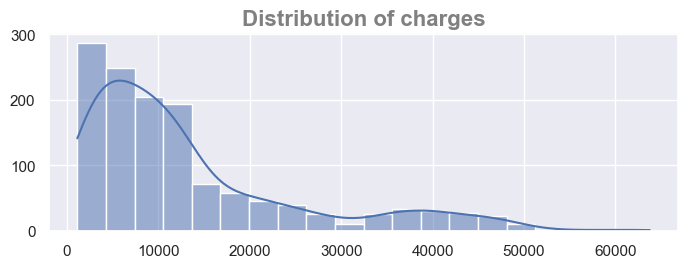

In [161]:
# Plotting the raw distribution of the `charges` column
plot_df_distributions(insurance[['charges']], figsize=(20, 3), bins=20, kde=True)


The `charges` column is right skewed as there are more "smaller" charges than large claims. This will cause the error in the model to be off centred, resulting in varance is not constant with the model biasing towards the extremes. To account for the target `charges` column can be transformed with the `boxcox()` function from `scipy.stats`. Below a log normal distribution and the box-cox transformation normal distribution.

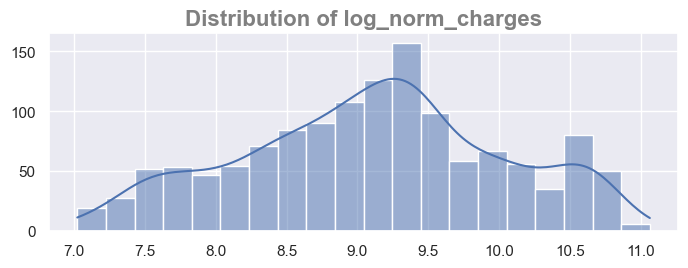

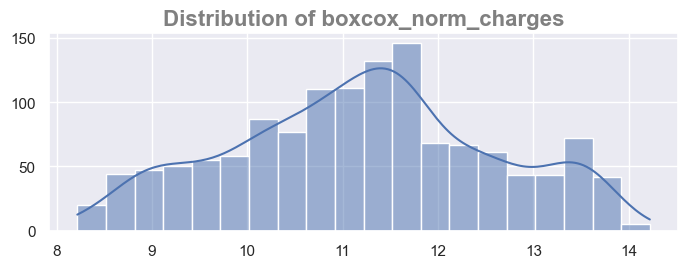

In [162]:
# log2 transformation
try:
    insurance["log_norm_charges"] = boxcox(insurance["charges"], lmbda = 0)
    plot_df_distributions(insurance[['log_norm_charges']], figsize=(20, 3), bins=20, kde=True)
except ValueError:
    print("Some value(s) in the 'normalized_losses' column are <= 0!")
    print("We can't apply the log transform to those values!")

# Box-Cox transformation
try:
    insurance["boxcox_norm_charges"] = boxcox(insurance["charges"])[0]
    plot_df_distributions(insurance[['boxcox_norm_charges']], figsize=(20, 3), bins=20, kde=True)
except ValueError:
    print("Some value(s) in the 'normalized_losses' column are <= 0!")
    print("We can't apply the Box-Cox transform to those values!")

Now test which of the two distribution is best based off the following information:

Using the Shapiro-Wilk test (a p-test) or the normaltest (combining skewness and kurtosis) depends on your preference and the characteristics of your data. Both tests provide valuable information about the normality of a dataset, but they have slightly different properties.

Considerations for choosing between the two:

1. **Shapiro-Wilk Test (p-test):**
   - This test specifically focuses on assessing whether the data follows a normal distribution.
   - It can be sensitive to departures from normality, including both skewness and heavy tails.
   - It's widely used for normality testing and is a good choice when you are primarily interested in the normality of your data.

2. **normaltest (combining skewness and kurtosis):**
   - This test combines measures of skewness and kurtosis to assess deviations from normality.
   - It can be less sensitive to deviations from normality compared to the Shapiro-Wilk test when the sample size is small.
   - It provides more information about the nature of the non-normality (skewness, heavy tails), which can be helpful in understanding your data.

In practice, it's often a good idea to use both tests and consider their results together. If both tests agree that the data is approximately normally distributed (i.e., both p-values are above your chosen significance level), that's a strong indication of normality. If they disagree, then examining the nature of non-normality in the data may be needed in order to decide on an appropriate course of action.

Ultimately, the choice between the p-test (Shapiro-Wilk) and normaltest should depend on specific analysis goals and the characteristics of the dataset. If a simple binary answer (normal or not) is desired, the p-test might be more straightforward. If a more detailed assessment of the non-normality is desired, the normaltest may provide additional insights.

In [163]:
test_normality_and_print_results(insurance['log_norm_charges'])
print('-'*80)
test_normality_and_print_results(insurance['boxcox_norm_charges'])

Shapiro-Wilk p-value: 2.286311071020286e-11
Shapiro-Wilk Test: The data does not follow a normal distribution.
Normaltest p-value: 3.5703676381337117e-12
Normaltest: The data does not follow a normal distribution.
--------------------------------------------------------------------------------
Shapiro-Wilk p-value: 3.250668831333847e-11
Shapiro-Wilk Test: The data does not follow a normal distribution.
Normaltest p-value: 1.5249631686757668e-12
Normaltest: The data does not follow a normal distribution.


From the normal distribution testing both transforms are not normally distributed but are close enough. Given between both tests the log2 transform preforms slightly better under the `normaltest` test that outcome column will be used going forward.

In [164]:
# dropping boxcox_norm_charges column
insurance = insurance.drop(columns=['boxcox_norm_charges'], axis=1)
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges,log_norm_charges
0,19,female,27.90,0,yes,southwest,16884.9240,9.734176
1,18,male,33.77,1,no,southeast,1725.5523,7.453302


### 2.2 Dealing with Categorical Features

Checking the categorical column values as these will need to be numericalised for model use.

In [165]:
categorical_cols = insurance.select_dtypes(include=['object']).columns.tolist()

display_markdown('Categorical Columns')
display(insurance[categorical_cols].nunique())

display_markdown('region value counts')
display(insurance['region'].value_counts())

**Categorical Columns**

sex       2
smoker    2
region    4
dtype: int64

**region value counts**

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [166]:
# making a copy of the original dataframe
insurance_numeric = insurance.copy()

# Transforming the categorical columns into numeric columns

# 1. Starting with the 'sex' column:
# Create a dictionary to map the values
sex_map = {'male' : 0,
           'female':1}

# Apply the mapping to the dataframe
insurance_numeric['sex'] = insurance_numeric['sex'].map(sex_map)


# 2. Next, the 'smoker' column:
# Create a dictionary to map the values
smoker_map = {'no' : 0,
              'yes':1}

# Apply the mapping to the dataframe
insurance_numeric['smoker'] = insurance_numeric['smoker'].map(smoker_map)


# 3. Finally, the 'region' column using one-hot encoding:
# note: not dropping reference as first using this to check for correlation to target column
region_dummies = pd.get_dummies(insurance_numeric['region'], 
                                prefix='region', 
                                drop_first=False, 
                                dtype=int
                                )

# Concatenate the original dataframe and the dummy dataframe
insurance_numeric = pd.concat([insurance_numeric, region_dummies], axis=1)
# dropping the original 'region' column
insurance_numeric.drop('region', axis=1, inplace=True)

# Checking the results
insurance_numeric.head()


,age,sex,bmi,children,smoker,charges,log_norm_charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,9.734176,0,0,0,1
1,18,0,33.770,1,0,1725.55230,7.453302,0,0,1,0
2,28,0,33.000,3,0,4449.46200,8.400538,0,0,1,0
3,33,0,22.705,0,0,21984.47061,9.998092,0,1,0,0
4,32,0,28.880,0,0,3866.85520,8.260197,0,1,0,0


### 2.3 Investigating Correlation to outcome `charges` column

In this section feature selection is carried out based on their correlatoin to the target.

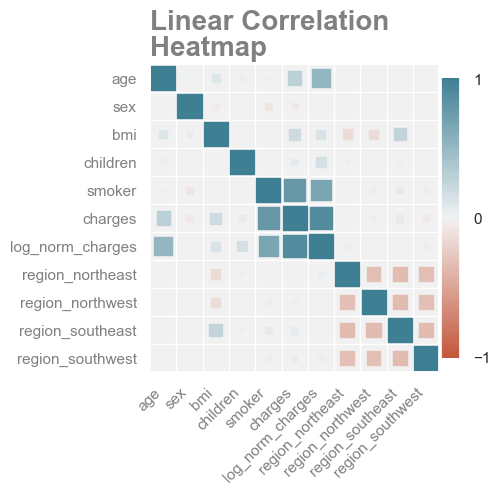

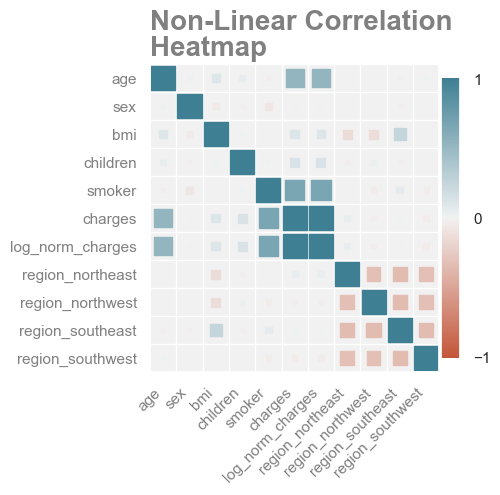

In [167]:
# Using the custom corrplot function to create a linear and non-linear correlation heatmap

# Linear Correlation Heatmap
plt.figure(figsize=(4, 4))
corrplot(insurance_numeric.corr(numeric_only=True), size_scale=300, title='Linear Correlation Heatmap')
plt.show()

# Non-Linear Correlation Heatmap
plt.figure(figsize=(4, 4))
corrplot(insurance_numeric.corr(method='spearman', numeric_only=True), 
         size_scale=300, title='Non-Linear Correlation Heatmap'
         )

In [168]:
disp_table_side_by_side(
    abs_corr_to_target(insurance_numeric, 'charges', exclude_target=False),
    abs_corr_to_target(insurance_numeric, 'charges', nonlinear_corr=True, exclude_target=False)
)

disp_table_side_by_side(
    abs_corr_to_target(insurance_numeric, 'log_norm_charges', exclude_target=False),
    abs_corr_to_target(insurance_numeric, 'log_norm_charges', nonlinear_corr=True, exclude_target=False)
)

,Features,lin corr to: `charges`
5,charges,1.000000
6,log_norm_charges,0.892964
4,smoker,0.787251
0,age,0.299008
2,bmi,0.198341
9,region_southeast,0.073982
3,children,0.067998
1,sex,0.057292
10,region_southwest,0.043210
8,region_northwest,0.039905


,Features,lin corr to: `log_norm_charges`
6,log_norm_charges,1.000000
5,charges,0.892964
4,smoker,0.665506
0,age,0.527834
3,children,0.161336
2,bmi,0.132669
7,region_northeast,0.043115
10,region_southwest,0.041632
8,region_northwest,0.017824
9,region_southeast,0.015791


**Observations from Correlations**

From the above correlation tables, it appears that the best features for model creation are:

- `smoker`
- `age`
- `bmi`
- `children`

Next, this box plots will be created to investigate this further.

### 2.4 Box Plot Distribution Comparisons
---

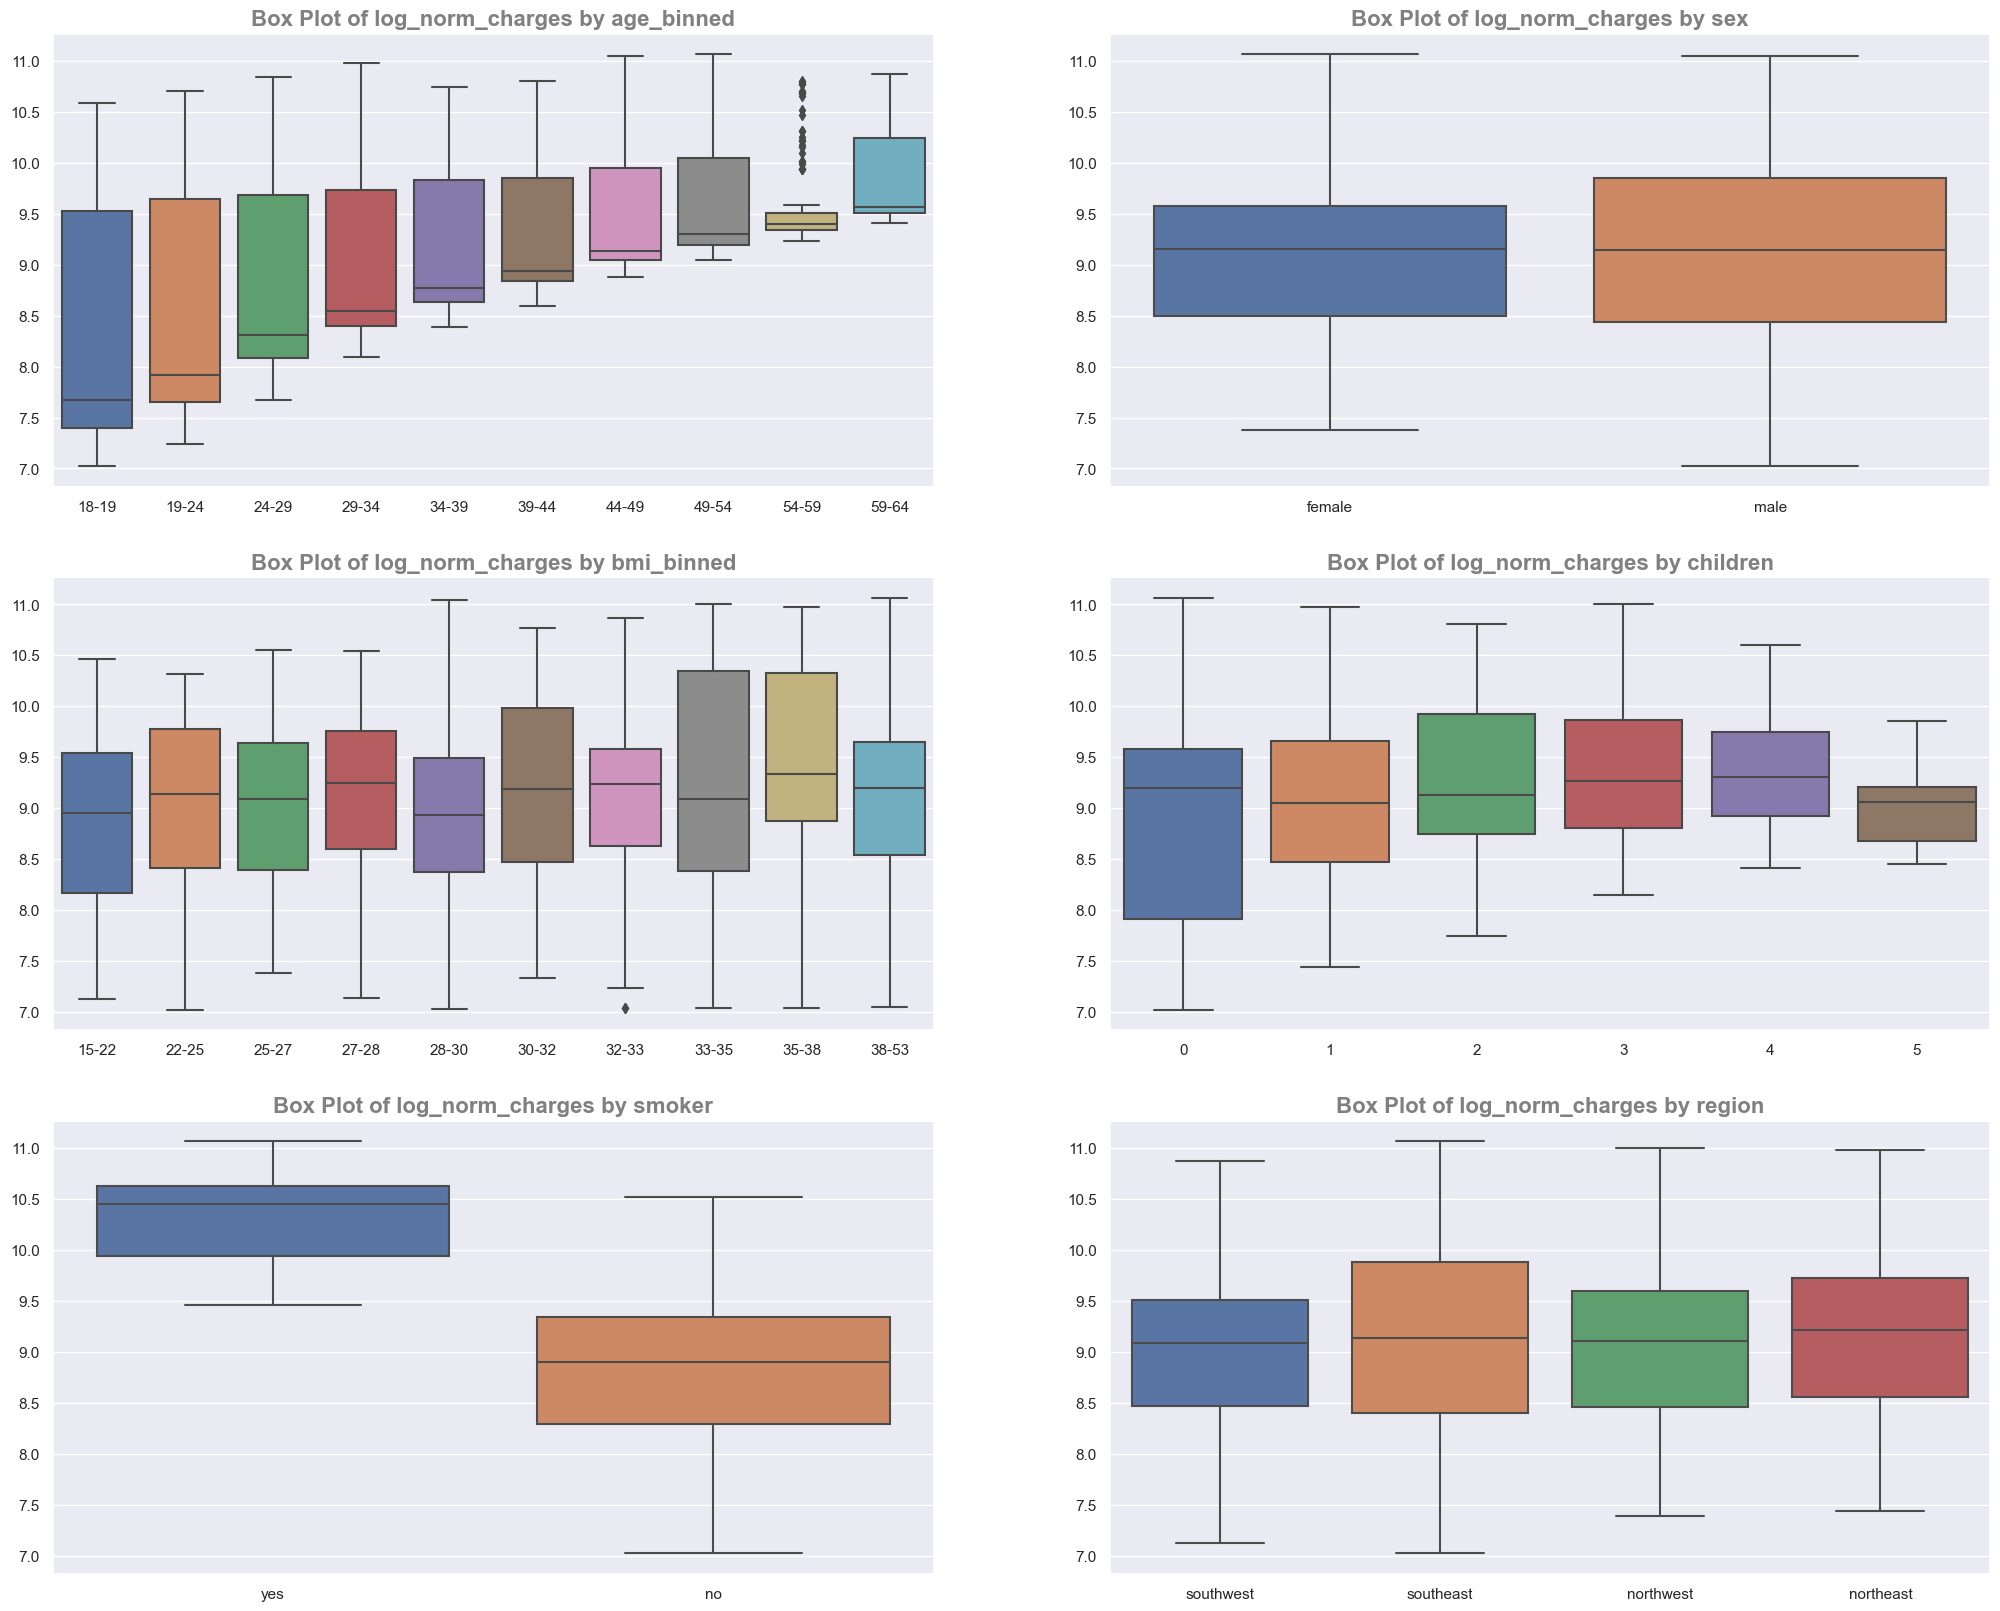

In [169]:
plot_box_plots(insurance, y_col='log_norm_charges', figsize=(25, 20), num_columns=2, exclude_cols=['charges'], bin_count=10)

**Observations from Box Plots**

The box plots confirm the correlations as:

- `region` cost/charge distributions are about the same so this feature continues to be excluded from the model

- `bmi` is weakly correlated, but this might not reflect the correlation between health outcomes and `bmi`. This only shows claims/charges with respect to `bmi` there could be some filter in place preventing health access for people with high BMIs. In saying that there appears to be some linearity associated with `bmi` and charges, so this feature will be included for now.

- There is a clear relationship between `age` and charges

- `children` track linearly until the jump from 4 to 5 children, where we see a drop in charges. This might have something to do this insurance access for people with a large number of children which we only start to see when the number hits 5. In saying that the correlation and linearity is strong enough to include this feature in the model for now.

- There is little difference between `sex` however, men have a large distribution of charge. This somewhat confirms a hypothesis that the charge difference between men and women occurs as men take on more occupational/activity hazards (hence the spread), whereas female charges are likely associated with childbirth. But there is not the data to confirm this properly.

**Selected Features**

- `smoker`
- `age`
- `bmi`
- `children`

## 3. Dividing the Data
---

In [170]:
# X Feature and y outcomes/target dataframes/series
features = ['age', 'bmi', 'children', 'smoker']
X = insurance_numeric[features].copy()
y = insurance_numeric['log_norm_charges'].copy()

# Set the proportion of the dataset to be used for the test set
test_set_proportion = 0.2

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_set_proportion, 
                                                    random_state=42
                                                    )

## 4. Building the Model
---

In [171]:
# Instantiate the Regression Model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_train)

# MSE on log scale
mse_log = mean_squared_error(y_train, y_pred)
print(f'mse_log: {mse_log}')

# MSE on original scale
mse = np.exp(mean_squared_error(y_train, y_pred))
print(f'mse: {mse}')

# R^2 score on the training data
r2 = r2_score(y_train, y_pred)
print(f'Coefficients of Determination r2: {r2}')

mse_log: 0.20570076726010136
mse: 1.2283855758133584
Coefficients of Determination r2: 0.7522390052182406


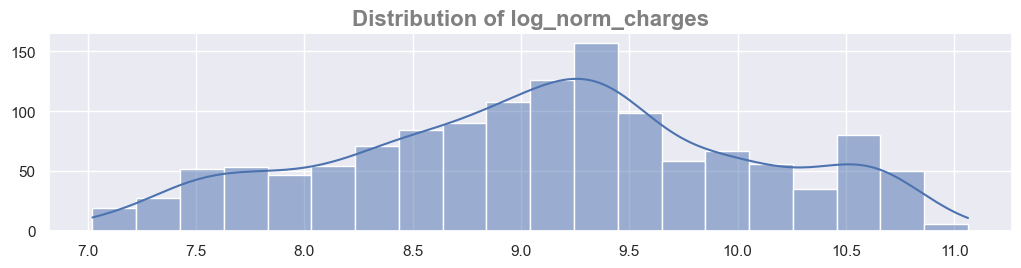

In [172]:
plot_df_distributions(y.to_frame(), figsize=(30, 3), bins=20, kde=True)

**Observation from above**

When comparing `mse_log` to the scale and range of the distribution plot above it is clear that the mean square error of the prediction is relatively low. The coefficients of determination $R^2$ shows the variance of the model indicating its accuracy on the train set in this case which is about $75%$ 

## 5. Residual Diagnostics
---

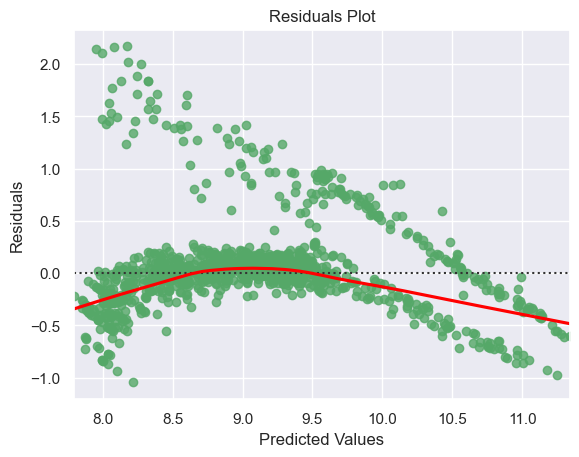

In [173]:
# calculating the residuals
residuals = y_train - y_pred

# Plotting the residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g', robust=True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

**Observation **from the Residuals Plot****

It's clear the model violates the assumptions of linear regression. It's expected that the residuals align about a mean zero line, which they do not. This indicates non-linearities in the features. It also shows an underestimation of cost at the very low and the high of charges.

## 6. Interpreting the Model
---

In [179]:
# Assuming you have the coefficients as a list
coefficients_log = model.coef_

# coefficeints on the original scale
percentage_changes = (np.exp(coefficients_log) - 1) * 100
    

# Assuming you have the feature names in a list
feature_names = ['age', 'bmi', 'children', 'smoker']  # Replace with your actual feature names

# Create a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 
                        'Coefficient_log': coefficients_log,
                        'percentage_changes' : percentage_changes})

# Display the DataFrame
coef_df


,Feature,Coefficient_log,percentage_changes
0,age,0.034326,3.492223
1,bmi,0.011384,1.144889
2,children,0.092538,9.695434
3,smoker,1.543789,368.229757


**Observations from the coefficients**

- For every unit point increase in `bmi` the charges increase by $1.14%$, given the `bmi` range of 37 `bmi` has a significant effect on health and costs associated.

- The same can said about age where there is a $3.5%$ increase in charges per year for a patient's age.

- For each child, there is a $9.7%$ increase in health costs, which makes sense as childbirth requires a large amount of interaction and time spent within the health care system. However, this effect is less than `age` and `bmi` as the range of values is larger than the number of children a person has. Unfortunately, this cost is burdened by women but we don't really see that in terms of the disparity between genders' charges/health cost from this data

- Lastly, `smoker` has a large effect on health costs with $368%$ increase in cost from smokers versus non-smokers. However, this data is binary and does not consider the duration and frequency that a smoker partakes. 

## 7. Final Model Evaluation
---

In [176]:
# Getting test predictions
y_test_pred = model.predict(X_test)

# MSE on log scale
mse_log = mean_squared_error(y_test, y_test_pred)
print(f'mse_log: {mse_log}')

# MSE on original scale
mse = np.exp(mean_squared_error(y_test, y_test_pred))
print(f'mse: {mse}')

# R^2 score on the test data
r2 = r2_score(y_test, y_test_pred)
print(f'Coefficients of Determination r2: {r2}')

mse_log: 0.1831893399625075
mse: 1.2010417917615648
Coefficients of Determination r2: 0.7962617559550184


## 8. Drawing Conclusions
---

The MSE and coefficients of determination between the test and training predictions are close with the test data performing slightly better. This shows the model is general and does not overfit to the training data. 

However, the residuals plot in Section 5 shows that the model is too conservative in it predictions of cost/charges at the very low and the high end of insurance claims.


### 8.1 Future/further work:

To improve the model complex predictors Should be tested as there lies non-linearities with the predictors. Second, if this fails to remove the conservative predictions a differnce non-linear ML model should be investigated and/or more simply the conservative predictions could be accounted for and offset however this last point introduces uncertainty. 